# Generate toy imbalanced dataset

In [1]:
from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot
from numpy import where
import matplotlib.pyplot as plt

In [2]:
# define dataset
X, y = make_classification(n_samples=5000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.99], flip_y=0)

# summarize class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label


Counter({0: 4950, 1: 50})


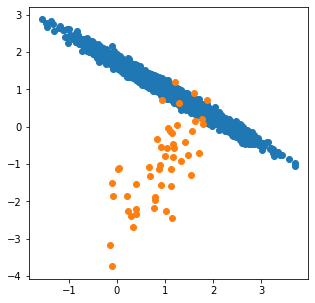

In [3]:

plt.figure(figsize=(5, 5))
for label, _ in counter.items():
    row_ix = where(y == label)[0]
    plt.scatter(X[row_ix, 0], X[row_ix, 1])
plt.show() 

# MODELS TEST

In [4]:
import numpy as np
from models_perso import GammaKnn, SimpleKnn, wKnn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
beta =1

knn = SimpleKnn(nb_nn=3)
knn.fit(X_train, y_train,None)
pred = knn.predict(X_test)

TN, FP, FN, TP = confusion_matrix(y_test, pred).ravel()
f_measure = (1+beta**2)*TP / ((1+beta**2)*TP+(beta**2)*FN+FP)
knn_F=round(f_measure, 3)

wknn = wKnn(nb_nn=3)
wknn.fit(X_train, y_train,None)
pred = wknn.predict(X_test)

TN, FP, FN, TP = confusion_matrix(y_test, pred).ravel()
f_measure = (1+beta**2)*TP / ((1+beta**2)*TP+(beta**2)*FN+FP)
wknn_F=round(f_measure, 3)


results=[]

gamma_list=np.arange(0, 2.1, 0.1)
for gamma in gamma_list:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=123)
    gammaKnn = GammaKnn(nb_nn=3, gamma=gamma)
    gammaKnn.fit(X_train, y_train)

    pred = gammaKnn.predict(X_test)
    TN, FP, FN, TP = confusion_matrix(y_test, pred).ravel()

    f_measure = (1+beta**2)*TP / ((1+beta**2)*TP+(beta**2)*FN+FP)
    results.append({"gamma":round(gamma,2),"F":round(f_measure, 3),"TN":TN,"FP":FP,"FN":FN,"TP":TP})

INIT Knn simple
INIT Knn simple
INIT
FIT
finish
predict
INIT
FIT
finish
predict
INIT
FIT
finish
predict
INIT
FIT
finish
predict
INIT
FIT
finish
predict
INIT
FIT
finish
predict
INIT
FIT
finish
predict
INIT
FIT
finish
predict
INIT
FIT
finish
predict
INIT
FIT
finish
predict
INIT
FIT
finish
predict
INIT
FIT
finish
predict
INIT
FIT
finish
predict
INIT
FIT
finish
predict
INIT
FIT
finish
predict
INIT
FIT
finish
predict
INIT
FIT
finish
predict
INIT
FIT
finish
predict
INIT
FIT
finish
predict
INIT
FIT
finish
predict
INIT
FIT
finish
predict


In [5]:
import pandas as pd 

DS=pd.DataFrame(results)
print(DS)

    gamma      F   TN   FP  FN  TP
0     0.0  0.022    0  989   0  11
1     0.1  0.647  977   12   0  11
2     0.2  0.909  988    1   1  10
3     0.3  0.952  989    0   1  10
4     0.4  0.952  989    0   1  10
5     0.5  0.952  989    0   1  10
6     0.6  0.952  989    0   1  10
7     0.7  0.952  989    0   1  10
8     0.8  0.900  989    0   2   9
9     0.9  0.900  989    0   2   9
10    1.0  0.900  989    0   2   9
11    1.1  0.900  989    0   2   9
12    1.2  0.900  989    0   2   9
13    1.3  0.900  989    0   2   9
14    1.4  0.900  989    0   2   9
15    1.5  0.900  989    0   2   9
16    1.6  0.900  989    0   2   9
17    1.7  0.900  989    0   2   9
18    1.8  0.900  989    0   2   9
19    1.9  0.842  989    0   3   8
20    2.0  0.842  989    0   3   8


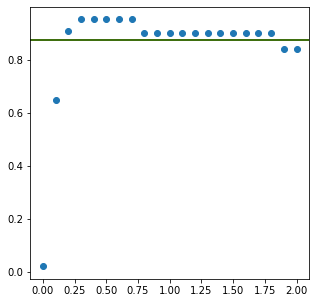

In [6]:
import matplotlib.lines as lines
plt.figure(figsize=(5, 5))
plt.scatter(DS['gamma'], DS['F'])
plt.axhline(y=knn_F, color='r', linestyle='-')
plt.axhline(y=wknn_F, color='g', linestyle='-')

plt.show() 

In [7]:
knn_F

0.875

In [8]:
wknn_F

0.875

# WITH Oversampling

In [10]:
from models_perso import GammaKnnOS

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
beta =1

knn = SimpleKnn(nb_nn=3)
knn.fit(X_train, y_train,"SMOTE")
pred = knn.predict(X_test)

TN, FP, FN, TP = confusion_matrix(y_test, pred).ravel()
f_measure = (1+beta**2)*TP / ((1+beta**2)*TP+(beta**2)*FN+FP)
knn_F=round(f_measure, 3)

wknn = wKnn(nb_nn=3)
wknn.fit(X_train, y_train,"SMOTE")
pred = wknn.predict(X_test)

TN, FP, FN, TP = confusion_matrix(y_test, pred).ravel()
f_measure = (1+beta**2)*TP / ((1+beta**2)*TP+(beta**2)*FN+FP)
wknn_F=round(f_measure, 3)


results=[]

gamma_list=np.arange(0, 2.1, 0.1)
for gamma in gamma_list:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=123)
    gammaKnn = GammaKnnOS(nb_nn=3, gamma_real=gamma, gamma_synth=gamma)
    gammaKnn.fit(X_train, y_train,"SMOTE")

    pred = gammaKnn.predict(X_test)
    TN, FP, FN, TP = confusion_matrix(y_test, pred).ravel()

    f_measure = (1+beta**2)*TP / ((1+beta**2)*TP+(beta**2)*FN+FP)
    results.append({"gamma_real":round(gamma,2),"F":round(f_measure, 3),"TN":TN,"FP":FP,"FN":FN,"TP":TP})

INIT Knn simple
INIT Knn simple
'os :' SMOTE
'os :' SMOTE
'os :' SMOTE
'os :' SMOTE
'os :' SMOTE
'os :' SMOTE
'os :' SMOTE
'os :' SMOTE
'os :' SMOTE
'os :' SMOTE
'os :' SMOTE
'os :' SMOTE
'os :' SMOTE
'os :' SMOTE
'os :' SMOTE
'os :' SMOTE
'os :' SMOTE
'os :' SMOTE
'os :' SMOTE
'os :' SMOTE
'os :' SMOTE


In [11]:
DS=pd.DataFrame(results)
print(DS)

    gamma_real      F   TN   FP  FN  TP
0          0.0  0.022    0  989   0  11
1          0.1  0.056  619  370   0  11
2          0.2  0.100  792  197   0  11
3          0.3  0.130  842  147   0  11
4          0.4  0.183  891   98   0  11
5          0.5  0.239  919   70   0  11
6          0.6  0.265  928   61   0  11
7          0.7  0.361  950   39   0  11
8          0.8  0.431  960   29   0  11
9          0.9  0.449  962   27   0  11
10         1.0  0.524  969   20   0  11
11         1.1  0.550  971   18   0  11
12         1.2  0.537  970   19   0  11
13         1.3  0.667  978   11   0  11
14         1.4  0.647  977   12   0  11
15         1.5  0.611  975   14   0  11
16         1.6  0.571  975   14   1  10
17         1.7  0.741  983    6   1  10
18         1.8  0.667  980    9   1  10
19         1.9  0.741  983    6   1  10
20         2.0  0.690  981    8   1  10


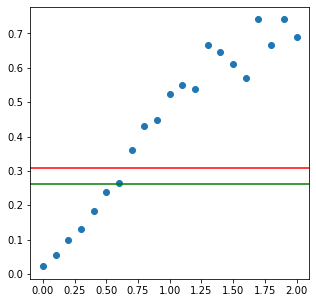

In [13]:
plt.figure(figsize=(5, 5))
plt.scatter(DS['gamma_real'], DS['F'])
plt.axhline(y=knn_F, color='r', linestyle='-')
plt.axhline(y=wknn_F, color='g', linestyle='-')

plt.show() 